In [1]:
from indexer import create_index, preprocess_doc
import pandas as pd
import math
import numpy as np

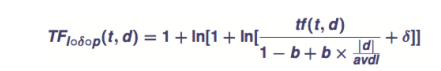

In [2]:
import math
import numpy as np

def idf(num_of_docs, num_of_docs_with_term):
    return float(math.log(num_of_docs/num_of_docs_with_term)) #log base?

def tf_p(term_frequency, max_frequency, doc_length, average_doc_length, delta, b = 0.75):
    tf = float(term_frequency/max_frequency)
    s = tf / (1 - b + b * (doc_length/average_doc_length))
    a = 1 + np.log(s + delta)
    tf_p = float(1 + np.log(a))
    return tf_p
def tf(ftd: float) -> float:
    return 1 + math.log(ftd)

tfidf = idf(10,3) * tf_p(20, 20, 100, 400, 0.1)
print(tfidf)

1.9572627706696366


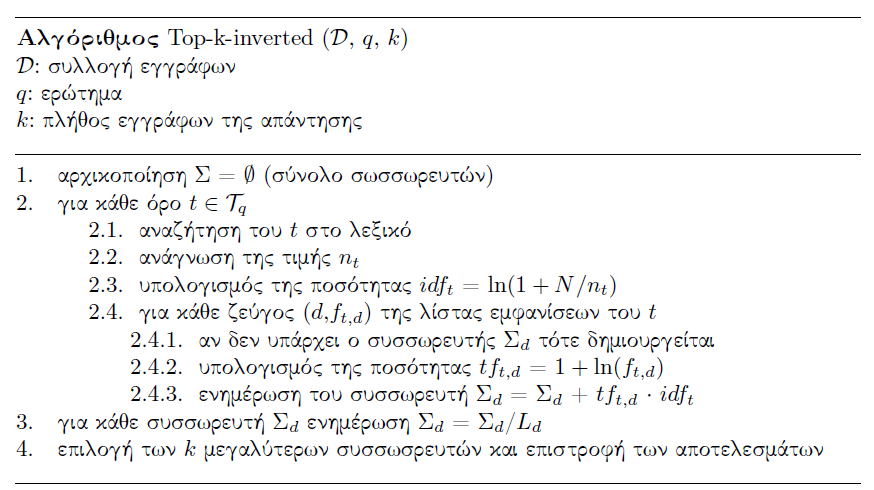

In [3]:
from indexer import create_index, preprocess_doc
import pandas as pd

def top_k(query: str, index: dict, k:int) -> list:
    acc = {}
    query = preprocess_doc(query)
    for term in query:
        print(term)
        try:
            data = index[term]
            nt = data['numdoc']
            term_idf = idf(num_of_docs=3000, num_of_docs_with_term=nt)
            for document in data["postinglist"].keys():
                #αν δεν υπάρχει ο συσσωρευτής τότε δημιουργείται
                if(document not in acc.keys()):
                    acc[document] = 0
                ftd = data["postinglist"][document]
                term_frequency = tf(ftd) 
                tfidf = term_idf * term_frequency
                acc[document] = acc[document] + tfidf
        except KeyError:
            print(f"Ο όρος δεν υπάρχει")
            
    sort_by_score = sorted(acc.items(), key=lambda x:x[1], reverse=True)
    top = sort_by_score[:k]
    return top

In [10]:
dataframe = pd.read_csv('Greek_Parliament_Proceedings_1989_2020.csv', chunksize=1000)
index = create_index(dataframe)
print(type(index))
query = {"_id" : "μακαρι"}
for x in index.find(query):
    print(type(x))
    print(x)
print(x['list']['numdoc'])

Length of chunk:  1000
CHUNK 1  FINISHED
Number of Tokens:  8666
<class 'dict'>
<class 'pymongo.collection.Collection'>
<class 'dict'>
{'_id': 'μακαρι', 'list': {'numdoc': 6, 'postinglist': {'0': 1, '290': 1, '410': 1, '564': 1, '674': 1, '807': 1}}}
6


In [44]:

query = {"list.postinglist.0" : {"$gt":0}}
for x in index.find(query):
    print(type(x))
    print(x["_id"])
    print(x['list']['numdoc'])

<class 'dict'>
παρακαλειτα
4
<class 'dict'>
γραμματ
24
<class 'dict'>
βουλγαρακ
5
<class 'dict'>
συνοδευς
2
<class 'dict'>
μακαρι
6
<class 'dict'>
αρχιεπισκοπ
1
<class 'dict'>
αθην
16
<class 'dict'>
πας
30
<class 'dict'>
ελλαδ
50
<class 'dict'>
σεραφειμ
1
<class 'dict'>
συνοδευοντ
1
<class 'dict'>
αυτον
45
<class 'dict'>
μελ
23
<class 'dict'>
ιερ
5
<class 'dict'>
συνοδ
8
<class 'dict'>
κατα
123
<class 'dict'>
εισοδ
2
<class 'dict'>
αιθους
53
<class 'dict'>
βουλ
160
<class 'dict'>
προκειμεν
21
<class 'dict'>
τελεσθ
2
<class 'dict'>
αγιασμ
1
<class 'dict'>
συνεχει
31
<class 'dict'>
τελειτα
1
<class 'dict'>
καθιερωμεν
3


In [ ]:
query = "αποχωρω"
results = top_k(query, index, 5)

αποχωρ


In [ ]:
print(results)

[('384', 8.006367567650246)]


In [1]:
text = "Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης.Στην ενισχυτική μάθηση το σύστημα προσπαθεί να μάθει αλληλεπιδρώντας με το περιβάλλον και λαμβάνοντας κάποιο σήμα επιβράβευσης, το οποίο προσπαθεί να μεγιστοποιήσει. Σε αυτό τον τύπο μάθησης υπάρχει η έννοια του πράκτορα (agent), που αποτελεί την οντότητα που καλείται να μάθει, και του περιβάλλοντος, με το οποίο ο πράκτορας αλληλεπιδρά. Ο πράκτορας επιλέγει ενέργειες σύμφωνα με τις καταστάσεις και την επιβράβευση που λαμβάνει από το περιβάλλον, ακολουθώντας την μέθοδο της δοκιμής και αποτυχίας (trial and error), με σκοπό να λάβει γνώση για την συμπεριφορά του περιβάλλοντος. Κάποιες από τις εφαρμογές αυτού του τύπου μάθησης συναντώνται στην ρομποτική, στα αυτόνομα οχήματα και στον τομέα των παιχνιδιών, με πιο γνωστό το παράδειγμα του AlphaGo Zero, παιχνίδι ‘’Go’’ που κατάφερε να κερδίσει τον παγκόσμιο πρωταθλητή Go μετά από μήνες αυτό-εκπαίδευσης."

In [4]:
from indexer import preprocess_doc
preprocess_doc(text.lower())

848


['ενισχυτ',
 'μαθης',
 'συστημ',
 'προσπαθ',
 'μαθ',
 'αλληλεπιδρ',
 'περιβαλλον',
 'λαμβαν',
 'καποι',
 'σημ',
 'επιβραβευς',
 'οποι',
 'προσπαθ',
 'μεγιστοποι',
 'αυτ',
 'τυπ',
 'μαθης',
 'υπαρχ',
 'εννοι',
 'πρακτορ',
 '(agent)',
 'αποτελ',
 'οντοτητ',
 'καλειτα',
 'μαθ',
 'περιβαλλοντ',
 'οποι',
 'πρακτορ',
 'αλληλεπιδρ',
 'πρακτορ',
 'επιλεγ',
 'ενεργει',
 'συμφων',
 'καταστας',
 'επιβραβευς',
 'λαμβαν',
 'περιβαλλον',
 'ακολουθ',
 'μεθοδ',
 'δοκιμ',
 'αποτυχ',
 '(trial',
 'and',
 'error)',
 'σκοπ',
 'λαβ',
 'γνως',
 'συμπεριφορ',
 'περιβαλλοντ',
 'καποι',
 'εφαρμογ',
 'αυτ',
 'τυπ',
 'μαθης',
 'συναντωντα',
 'ρομποτ',
 'αυτονομ',
 'οχημ',
 'τομ',
 'παιχνιδ',
 'γνωστ',
 'παραδειγμ',
 'alphago',
 'zero',
 'παιχνιδ',
 '‘’go’’',
 'καταφερ',
 'κερδις',
 'παγκοσμ',
 'πρωταθλητ',
 'go',
 'μην',
 'αυτ',
 'εκπαιδευς',
 'ενισχυτ',
 'μαθης',
 'συστημ',
 'προσπαθ',
 'μαθ',
 'αλληλεπιδρ',
 'περιβαλλον',
 'λαμβαν',
 'καποι',
 'σημ',
 'επιβραβευς',
 'οποι',
 'προσπαθ',
 'μεγιστοποι',
 'αυτ',
 '